In [53]:
import csv

In [54]:
import pandas as pd

In [55]:
csv = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
black_suicide_df = pd.read_csv(csv)

In [56]:
def create_ethnicity_column(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[1]
        else:
            return splits[0]
    except:
        return "FAILED"
def gender(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[0]
        else:
            return "FAILED"
    except:
        return "FAILED"
    
black_suicide_df['Gender'] = black_suicide_df['STUB_LABEL'].apply(gender)

black_suicide_df['ETHNICITY'] = black_suicide_df['STUB_LABEL'].apply(create_ethnicity_column)

black_df = black_suicide_df.loc[black_suicide_df["ETHNICITY"] == "Black or African American"]
black_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
168,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1950,1,All ages,0.0,7.5,NaN,Male,Black or African American
169,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1960,2,All ages,0.0,8.4,NaN,Male,Black or African American
170,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1970,3,All ages,0.0,10.0,NaN,Male,Black or African American
171,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1980,4,All ages,0.0,11.4,NaN,Male,Black or African American
172,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1981,5,All ages,0.0,11.4,NaN,Male,Black or African American


In [57]:
mask = (black_df['YEAR'] > 1980) & (black_df['YEAR'] <= 2018)
filtered_black_df = black_df.loc[mask]
filtered_black_df

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
172,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.120,1981,5,All ages,0.0,11.4,NaN,Male,Black or African American
173,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.120,1982,6,All ages,0.0,11.2,NaN,Male,Black or African American
174,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.120,1983,7,All ages,0.0,11.1,NaN,Male,Black or African American
175,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.120,1984,8,All ages,0.0,11.7,NaN,Male,Black or African American
176,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.120,1985,9,All ages,0.0,11.8,NaN,Male,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race (Single race)",9,Female: Black or African American: 25-44 years,5.223,2018,42,25-44 years,3.0,4.2,NaN,Female,Black or African American
6324,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race (Single race)",9,Female: Black or African American: 45-64 years,5.224,2018,42,45-64 years,4.0,3.0,NaN,Female,Black or African American
6325,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race (Single race)",9,Female: Black or African American: 45-64 years,5.224,2018,42,45-64 years,4.0,5.3,NaN,Female,Black or African American
6326,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race (Single race)",9,Female: Black or African American: 65 years an...,5.225,2018,42,65 years and over,5.0,1.3,NaN,Female,Black or African American


In [72]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Age')

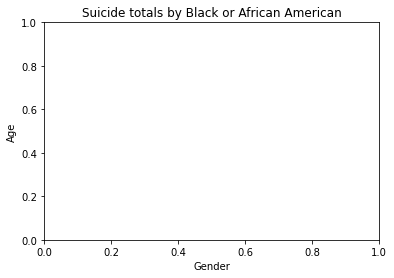

In [73]:
plt.title("Suicide totals by Black or African American")
plt.xlabel("Gender")
plt.ylabel("Age")

Text(0, 0.5, 'ESTIMATE')

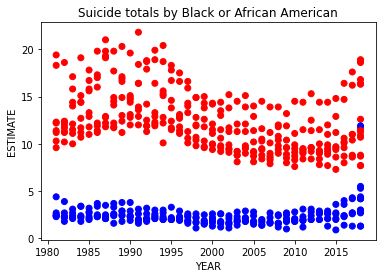

In [90]:
colors = {'Male':'red', 'Female':'blue'}
plt.scatter(filtered_black_df['YEAR'], filtered_black_df['ESTIMATE'], c=filtered_black_df['Gender'].map(colors))
plt.title("Suicide totals by Black or African American")
plt.xlabel("YEAR")
plt.ylabel("ESTIMATE")